[View in Colaboratory](https://colab.research.google.com/github/andriyrizhiy/Kaggle/blob/master/MobileNet.ipynb)

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 51kB 6.2MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/61/d6/e6/38fc0e2316f49b91aafdaf9a8d7756a9906b2ad7e501c1e165
Successfully built kaggle


In [0]:
from google.colab import files
import numpy as np

In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
!kaggle competitions files -c plant-seedlings-classification 

name                       size  creationDate         
-------------------------  ----  -------------------  
sample_submission.csv.zip   5KB  2017-11-21 20:07:18  
test.zip                   86MB  2017-11-21 20:07:09  
train.zip                   2GB  2017-11-21 20:11:07  


In [5]:
!kaggle competitions download -c plant-seedlings-classification -p /content/kaggle --force

  0%|                                               | 0.00/5.13k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 5.13k/5.13k [00:00<00:00, 2.80MB/s]
 85%|████████████████████████████████▎     | 73.0M/86.0M [00:00<00:00, 66.9MB/s]
100%|███████████████████████████████████████| 86.0M/86.0M [00:00<00:00, 133MB/s]
 99%|██████████████████████████████████████▋| 1.59G/1.60G [00:13<00:00, 119MB/s]
100%|███████████████████████████████████████| 1.60G/1.60G [00:13<00:00, 127MB/s]


In [0]:
!rm -rf 3

In [0]:
!ls -shSR 3

In [0]:
!unzip /content/kaggle/train.zip -d 2

In [0]:
!unzip /content/kaggle/test.zip -d 2

In [0]:
!mkdir '3'
!mkdir '3/test'
!mkdir '3/train'
!mkdir '3/train/Loose Silky-bent'
!mkdir '3/train/Scentless Mayweed'
!mkdir '3/train/Cleavers'
!mkdir '3/train/Charlock'
!mkdir '3/train/Small-flowered Cranesbill'
!mkdir '3/train/Common wheat'
!mkdir '3/train/Common Chickweed'
!mkdir '3/train/Sugar beet'
!mkdir '3/train/Maize'
!mkdir '3/train/Fat Hen'
!mkdir '3/train/Black-grass'
!mkdir '3/train/Shepherds Purse'

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import tensorflow as tf

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask=mask)
    return output

def image(path, pathto):
    img = cv2.imread(path)
    img = segment_plant(img)
    img = cv2.resize(img,(224 ,224 ))
    cv2.imwrite(pathto, img)


direct = '2'
direct = os.path.join(direct,'train')

direct3 = '3'
direct3 = os.path.join(direct3,'train')

def image_iterator():
    root = direct
    for clas in os.listdir(root):
        path = os.path.join(root,clas)
        for file in os.listdir(path):
            image_path = os.path.join(path,file)
            to = os.path.join(direct3,clas)
            to = os.path.join(to,file)
            yield image_path, to

files_dataset = tf.data.Dataset.from_generator(
    image_iterator,
    output_types=(tf.string, tf.string),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([]))
)

iterator = files_dataset.make_one_shot_iterator()
next_elem = iterator.get_next()


In [47]:
with tf.Session() as sess:
    for i in range(4750):
        if (i % 100 == 0):
            print(i)
        e = sess.run(next_elem)
        image(e[0].decode("utf-8"), e[1].decode("utf-8"))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700


In [0]:
direct = '2'
direct = os.path.join(direct,'test')
direct3 = '3'
direct3 = os.path.join(direct3,'test')

def image_iterator():
    root = direct
    for file in os.listdir(root):
        image_path = os.path.join(root,file)
        to = os.path.join(direct3,file)
        yield image_path, to

files_dataset = tf.data.Dataset.from_generator(
    image_iterator,
    output_types=(tf.string, tf.string),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([]))
)

iterator = files_dataset.make_one_shot_iterator()
next_elem = iterator.get_next()



In [0]:
with tf.Session() as sess:
    for i in range(794):
#         if (i % 100 == 0):
#             print(i)
        e = sess.run(next_elem)
        image(e[0].decode("utf-8"), e[1].decode("utf-8"))


In [0]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import functools
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import cv2
%matplotlib inline  

In [0]:
!ls -shSR 3

In [56]:
!rm -r '3/train/Loose Silky-bent/*'

rm: cannot remove '3/train/Loose Silky-bent/*': No such file or directory


In [0]:
direct = '3'
direct = os.path.join(direct,'train')

def image_iterator(dataset_path = direct):
    root = dataset_path
    for clas in os.listdir(root):
        path = os.path.join(root,clas)
        for file in os.listdir(path):
            image_path = os.path.join(path,file)
            yield clas, image_path


In [0]:
files_dataset = tf.data.Dataset.from_generator(
    image_iterator,
    output_types=(tf.string, tf.string),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([]))
)
iterator = files_dataset.make_one_shot_iterator()
next_elem = iterator.get_next()

In [53]:
k = cv2.imread('3/train/Black-grass/0ace21089.png')
k.shape

(224, 224, 3)

In [0]:
y = []
x = []
with tf.Session() as sess:
    for i in range(4750):
#         if (i % 100 == 0):
#             print(i)
        e = sess.run(next_elem)
        k = cv2.imread(e[1].decode("utf-8"))
        x.append(k)
        y.append(e[0].decode("utf-8"))

In [55]:
x = np.array(x)
x.shape

(4750, 224, 224, 3)

In [0]:
directtest = '3'
directtest = os.path.join(directtest,'test')

def image_iterator2(dataset_path = directtest):
    root = dataset_path
    for path in os.listdir(root):
        image_path = os.path.join(root,path)
        yield image_path, path

In [0]:
files_dataset_test = tf.data.Dataset.from_generator(
    image_iterator2,
    output_types=(tf.string,tf.string),
    output_shapes=(tf.TensorShape([]),tf.TensorShape([]))
)
iterator2 = files_dataset_test.make_one_shot_iterator()
next_elem2 = iterator2.get_next()

In [0]:
x_test = np.zeros((794,224 ,224 ,3))

In [0]:
names = []

In [0]:
with tf.Session() as sess:
    for i in range(794):
        e = sess.run(next_elem2)
#         print(e)
        k = cv2.imread(e[0].decode("utf-8"))
        names.append(e[1].decode("utf-8"))
        x_test[i] = k

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# clf = MLPClassifier(е=(50,),verbose=True)
from sklearn.multiclass import OneVsRestClassifier
# clf = OneVsRestClassifier(SVC(C = 5000,verbose=True))

# clf = OneVsRestClassifier(SGDClassifier(verbose=True))
# clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128, 64, 32, 12),verbose=True))

# clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(300, 400, 300, 100, 12),verbose=True))
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 13))

In [0]:
from keras.applications import Xception
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = y
values = np.array(data)
# print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
# inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
# print(inverted)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
X_train, X_val, y_train, y_val = train_test_split(x, onehot_encoded, test_size=0.2, random_state=42)

In [0]:
import keras

In [0]:
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications import MobileNet
base_model = MobileNet(input_shape=(224 , 224 , 3), include_top=False, weights='imagenet', pooling='avg')
xe = base_model.output
xe = Dense(256, activation='relu')(xe)
xe = Dropout(0.5)(xe)
predictions = Dense(12, activation='softmax')(xe)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [79]:
hist = model.fit(x, onehot_encoded, batch_size=12, 
                           epochs=100, validation_data=(X_val, y_val))

Train on 4750 samples, validate on 950 samples
Epoch 1/100
4750/4750 [==============================] - 98s 21ms/step - loss: 1.0569 - acc: 0.6688 - val_loss: 4.7522 - val_acc: 0.3189
Epoch 2/100
1872/4750 [==========>...................] - ETA: 51s - loss: 0.7037 - acc: 0.7756

4750/4750 [==============================] - 90s 19ms/step - loss: 0.6423 - acc: 0.7907 - val_loss: 0.4813 - val_acc: 0.8463
Epoch 3/100
4380/4750 [==========================>...] - ETA: 6s - loss: 0.5085 - acc: 0.8306

4750/4750 [==============================] - 90s 19ms/step - loss: 0.5085 - acc: 0.8299 - val_loss: 0.4376 - val_acc: 0.8484
Epoch 4/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.4516 - acc: 0.8562 - val_loss: 9.6364 - val_acc: 0.2053
Epoch 5/100
 336/4750 [=>............................] - ETA: 1:18 - loss: 0.3793 - acc: 0.8423

4750/4750 [==============================] - 89s 19ms/step - loss: 0.4152 - acc: 0.8678 - val_loss: 0.4025 - val_acc: 0.8495
Epoch 6/100
3792/4750 [======================>.......] - ETA: 17s - loss: 0.3397 - acc: 0.8855

4750/4750 [==============================] - 90s 19ms/step - loss: 0.3440 - acc: 0.8842 - val_loss: 0.5569 - val_acc: 0.8821
Epoch 7/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.3231 - acc: 0.8941 - val_loss: 0.2093 - val_acc: 0.9179
Epoch 8/100
 204/4750 [>.............................] - ETA: 1:21 - loss: 0.3352 - acc: 0.8775

4750/4750 [==============================] - 90s 19ms/step - loss: 0.3052 - acc: 0.8996 - val_loss: 0.2203 - val_acc: 0.9242
Epoch 9/100
3744/4750 [======================>.......] - ETA: 17s - loss: 0.2490 - acc: 0.9180

4750/4750 [==============================] - 90s 19ms/step - loss: 0.2410 - acc: 0.9192 - val_loss: 0.2638 - val_acc: 0.9221
Epoch 10/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.2729 - acc: 0.9133 - val_loss: 0.2162 - val_acc: 0.9126
Epoch 11/100
 180/4750 [>.............................] - ETA: 1:20 - loss: 0.1875 - acc: 0.9444

4750/4750 [==============================] - 91s 19ms/step - loss: 0.2514 - acc: 0.9211 - val_loss: 0.4234 - val_acc: 0.8421
Epoch 12/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.2430 - acc: 0.9215

4750/4750 [==============================] - 90s 19ms/step - loss: 0.2287 - acc: 0.9240 - val_loss: 0.1034 - val_acc: 0.9632
Epoch 13/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.2229 - acc: 0.9246 - val_loss: 0.8148 - val_acc: 0.8189
Epoch 14/100
 168/4750 [>.............................] - ETA: 1:22 - loss: 0.1617 - acc: 0.9286

4750/4750 [==============================] - 90s 19ms/step - loss: 0.2190 - acc: 0.9312 - val_loss: 0.3319 - val_acc: 0.9105
Epoch 15/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1849 - acc: 0.9433

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1910 - acc: 0.9419 - val_loss: 0.8214 - val_acc: 0.7821
Epoch 16/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.2184 - acc: 0.9349 - val_loss: 0.0879 - val_acc: 0.9695
Epoch 17/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.2056 - acc: 0.9464

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1898 - acc: 0.9381 - val_loss: 0.3921 - val_acc: 0.8811
Epoch 18/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1867 - acc: 0.9414

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1956 - acc: 0.9360 - val_loss: 0.1222 - val_acc: 0.9495
Epoch 19/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.1369 - acc: 0.9564 - val_loss: 0.2274 - val_acc: 0.8968
Epoch 20/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.2072 - acc: 0.9405

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1654 - acc: 0.9495 - val_loss: 0.1069 - val_acc: 0.9579
Epoch 21/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1551 - acc: 0.9538

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1519 - acc: 0.9545 - val_loss: 0.0963 - val_acc: 0.9642
Epoch 22/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.1180 - acc: 0.9600 - val_loss: 0.1631 - val_acc: 0.9400
Epoch 23/100
 168/4750 [>.............................] - ETA: 1:19 - loss: 0.1252 - acc: 0.9643

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1563 - acc: 0.9524 - val_loss: 0.0582 - val_acc: 0.9779
Epoch 24/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1275 - acc: 0.9599

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1228 - acc: 0.9615 - val_loss: 0.0743 - val_acc: 0.9737
Epoch 25/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.1529 - acc: 0.9549 - val_loss: 0.1538 - val_acc: 0.9505
Epoch 26/100
 168/4750 [>.............................] - ETA: 1:19 - loss: 0.1610 - acc: 0.9524

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1248 - acc: 0.9619 - val_loss: 0.0672 - val_acc: 0.9768
Epoch 27/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1160 - acc: 0.9653

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1171 - acc: 0.9636 - val_loss: 0.0431 - val_acc: 0.9863
Epoch 28/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0938 - acc: 0.9718 - val_loss: 1.7624 - val_acc: 0.7811
Epoch 29/100
 156/4750 [..............................] - ETA: 1:20 - loss: 0.1564 - acc: 0.9615

4750/4750 [==============================] - 90s 19ms/step - loss: 0.1294 - acc: 0.9653 - val_loss: 0.0431 - val_acc: 0.9863
Epoch 30/100
3708/4750 [======================>.......] - ETA: 18s - loss: 0.0832 - acc: 0.9755

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0881 - acc: 0.9747 - val_loss: 0.1150 - val_acc: 0.9674
Epoch 31/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.1072 - acc: 0.9693 - val_loss: 5.1840 - val_acc: 0.5495
Epoch 32/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.1410 - acc: 0.9762

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0982 - acc: 0.9707 - val_loss: 0.0665 - val_acc: 0.9737
Epoch 33/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0517 - acc: 0.9858

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0635 - acc: 0.9832 - val_loss: 0.2363 - val_acc: 0.9453
Epoch 34/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.1072 - acc: 0.9699 - val_loss: 0.0492 - val_acc: 0.9842
Epoch 35/100
 156/4750 [..............................] - ETA: 1:21 - loss: 0.0448 - acc: 0.9808

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1466 - acc: 0.9579 - val_loss: 0.0860 - val_acc: 0.9632
Epoch 36/100
3708/4750 [======================>.......] - ETA: 18s - loss: 0.0560 - acc: 0.9830

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0595 - acc: 0.9819 - val_loss: 0.0471 - val_acc: 0.9905
Epoch 37/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.1143 - acc: 0.9680 - val_loss: 0.0545 - val_acc: 0.9821
Epoch 38/100
 156/4750 [..............................] - ETA: 1:21 - loss: 0.0453 - acc: 0.9744

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0715 - acc: 0.9804 - val_loss: 0.0270 - val_acc: 0.9916
Epoch 39/100
3696/4750 [======================>.......] - ETA: 18s - loss: 0.0525 - acc: 0.9859

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0597 - acc: 0.9832 - val_loss: 0.0831 - val_acc: 0.9747
Epoch 40/100
4750/4750 [==============================] - 88s 19ms/step - loss: 0.0894 - acc: 0.9743 - val_loss: 0.1991 - val_acc: 0.9505
Epoch 41/100
 168/4750 [>.............................] - ETA: 1:19 - loss: 0.1588 - acc: 0.9762

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0918 - acc: 0.9747 - val_loss: 0.0714 - val_acc: 0.9821
Epoch 42/100
3720/4750 [======================>.......] - ETA: 17s - loss: 0.0947 - acc: 0.9772

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0897 - acc: 0.9779 - val_loss: 0.0283 - val_acc: 0.9926
Epoch 43/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0711 - acc: 0.9785 - val_loss: 0.0161 - val_acc: 0.9958
Epoch 44/100
 168/4750 [>.............................] - ETA: 1:22 - loss: 0.0341 - acc: 0.9881

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0611 - acc: 0.9798 - val_loss: 0.0178 - val_acc: 0.9926
Epoch 45/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0472 - acc: 0.9866

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0254 - val_acc: 0.9874
Epoch 46/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0722 - acc: 0.9787 - val_loss: 0.0197 - val_acc: 0.9947
Epoch 47/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.0107 - acc: 0.9940

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0728 - acc: 0.9836 - val_loss: 0.0407 - val_acc: 0.9895
Epoch 48/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0695 - acc: 0.9788

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0690 - acc: 0.9781 - val_loss: 0.0104 - val_acc: 0.9968
Epoch 49/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0927 - acc: 0.9749 - val_loss: 0.0232 - val_acc: 0.9937
Epoch 50/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.0298 - acc: 0.9940

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0716 - acc: 0.9813 - val_loss: 0.0276 - val_acc: 0.9937
Epoch 51/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0409 - acc: 0.9868

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0402 - acc: 0.9867 - val_loss: 0.0163 - val_acc: 0.9947
Epoch 52/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0532 - acc: 0.9857 - val_loss: 0.0477 - val_acc: 0.9832
Epoch 53/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.0405 - acc: 0.9940

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0408 - acc: 0.9884 - val_loss: 0.0632 - val_acc: 0.9779
Epoch 54/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0489 - acc: 0.9876

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0630 - acc: 0.9844 - val_loss: 0.0078 - val_acc: 0.9958
Epoch 55/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0572 - acc: 0.9825 - val_loss: 0.0473 - val_acc: 0.9811
Epoch 56/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0163 - acc: 0.9940

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0339 - acc: 0.9886 - val_loss: 0.0282 - val_acc: 0.9937
Epoch 57/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0599 - acc: 0.9817

4750/4750 [==============================] - 91s 19ms/step - loss: 0.0662 - acc: 0.9815 - val_loss: 0.3904 - val_acc: 0.8905
Epoch 58/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0389 - acc: 0.9869 - val_loss: 0.0037 - val_acc: 0.9989
Epoch 59/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0480 - acc: 0.9821

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0507 - acc: 0.9859 - val_loss: 0.0124 - val_acc: 0.9968
Epoch 60/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0507 - acc: 0.9860

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0429 - acc: 0.9886 - val_loss: 0.0049 - val_acc: 0.9979
Epoch 61/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0092 - val_acc: 0.9979
Epoch 62/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0120 - acc: 1.0000

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0804 - val_acc: 0.9800
Epoch 63/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0449 - acc: 0.9874

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0466 - acc: 0.9872 - val_loss: 0.1858 - val_acc: 0.9558
Epoch 64/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0486 - acc: 0.9878 - val_loss: 0.0220 - val_acc: 0.9916
Epoch 65/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0170 - acc: 0.9940

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0833 - acc: 0.9781 - val_loss: 0.0320 - val_acc: 0.9905
Epoch 66/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0699 - acc: 0.9798

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0616 - acc: 0.9819 - val_loss: 0.0066 - val_acc: 0.9968
Epoch 67/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0596 - val_acc: 0.9916
Epoch 68/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0637 - acc: 0.9762

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0459 - acc: 0.9851 - val_loss: 0.0065 - val_acc: 0.9968
Epoch 69/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0544 - acc: 0.9852

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0476 - acc: 0.9865 - val_loss: 0.0060 - val_acc: 0.9989
Epoch 70/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0086 - val_acc: 0.9958
Epoch 71/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.0844 - acc: 0.9940

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0389 - acc: 0.9907 - val_loss: 0.1582 - val_acc: 0.9632
Epoch 72/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.1010 - acc: 0.9785

4750/4750 [==============================] - 89s 19ms/step - loss: 0.1045 - acc: 0.9781 - val_loss: 0.0114 - val_acc: 0.9979
Epoch 73/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0368 - acc: 0.9891 - val_loss: 0.0084 - val_acc: 0.9958
Epoch 74/100
 168/4750 [>.............................] - ETA: 1:22 - loss: 0.0163 - acc: 0.9940

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0660 - acc: 0.9844 - val_loss: 0.0221 - val_acc: 0.9926
Epoch 75/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0460 - acc: 0.9901

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0550 - acc: 0.9867 - val_loss: 0.0125 - val_acc: 0.9968
Epoch 76/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0044 - val_acc: 0.9989
Epoch 77/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.0037 - acc: 1.0000

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0653 - val_acc: 0.9811
Epoch 78/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0536 - acc: 0.9860

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0550 - acc: 0.9853 - val_loss: 0.0123 - val_acc: 0.9979
Epoch 79/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0364 - acc: 0.9901 - val_loss: 0.0039 - val_acc: 0.9979
Epoch 80/100
 168/4750 [>.............................] - ETA: 1:20 - loss: 0.0047 - acc: 1.0000

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0374 - acc: 0.9912 - val_loss: 0.0889 - val_acc: 0.9779
Epoch 81/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0565 - acc: 0.9874

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0604 - acc: 0.9869 - val_loss: 0.0806 - val_acc: 0.9716
Epoch 82/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0365 - acc: 0.9912 - val_loss: 0.0053 - val_acc: 0.9979
Epoch 83/100
 168/4750 [>.............................] - ETA: 1:22 - loss: 0.0043 - acc: 1.0000

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0385 - acc: 0.9886 - val_loss: 0.0158 - val_acc: 0.9958
Epoch 84/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0303 - acc: 0.9925

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0281 - acc: 0.9926 - val_loss: 0.0063 - val_acc: 0.9979
Epoch 85/100
4750/4750 [==============================] - 88s 19ms/step - loss: 0.0285 - acc: 0.9920 - val_loss: 0.0051 - val_acc: 0.9979
Epoch 86/100
 168/4750 [>.............................] - ETA: 1:19 - loss: 0.0288 - acc: 0.9940

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0035 - val_acc: 0.9979
Epoch 87/100
3720/4750 [======================>.......] - ETA: 17s - loss: 0.0240 - acc: 0.9925

4750/4750 [==============================] - 88s 19ms/step - loss: 0.0402 - acc: 0.9884 - val_loss: 1.2175 - val_acc: 0.8032
Epoch 88/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0522 - acc: 0.9867 - val_loss: 0.0310 - val_acc: 0.9926
Epoch 89/100
 168/4750 [>.............................] - ETA: 1:22 - loss: 0.0681 - acc: 0.9762

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0281 - acc: 0.9920 - val_loss: 0.0038 - val_acc: 0.9989
Epoch 90/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0225 - acc: 0.9952

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0277 - acc: 0.9941 - val_loss: 0.1353 - val_acc: 0.9642
Epoch 91/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0405 - acc: 0.9876 - val_loss: 0.0245 - val_acc: 0.9905
Epoch 92/100
 168/4750 [>.............................] - ETA: 1:19 - loss: 0.0213 - acc: 0.9940

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0234 - acc: 0.9941 - val_loss: 0.0401 - val_acc: 0.9947
Epoch 93/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0459 - acc: 0.9882

4750/4750 [==============================] - 91s 19ms/step - loss: 0.0578 - acc: 0.9859 - val_loss: 0.0333 - val_acc: 0.9926
Epoch 94/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0404 - acc: 0.9888 - val_loss: 0.4165 - val_acc: 0.9463
Epoch 95/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 0.2467 - acc: 0.9762

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0586 - acc: 0.9867 - val_loss: 0.0069 - val_acc: 0.9979
Epoch 96/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0089 - acc: 0.9968

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0157 - acc: 0.9956 - val_loss: 0.0213 - val_acc: 0.9905
Epoch 97/100
4750/4750 [==============================] - 90s 19ms/step - loss: 0.0277 - acc: 0.9909 - val_loss: 0.0024 - val_acc: 0.9989
Epoch 98/100
 168/4750 [>.............................] - ETA: 1:21 - loss: 5.8372e-04 - acc: 1.0000

4750/4750 [==============================] - 89s 19ms/step - loss: 0.0327 - acc: 0.9905 - val_loss: 0.1247 - val_acc: 0.9821
Epoch 99/100
3720/4750 [======================>.......] - ETA: 18s - loss: 0.0441 - acc: 0.9892

4750/4750 [==============================] - 90s 19ms/step - loss: 0.0406 - acc: 0.9895 - val_loss: 0.0070 - val_acc: 0.9979
Epoch 100/100
4750/4750 [==============================] - 89s 19ms/step - loss: 0.0199 - acc: 0.9928 - val_loss: 0.0023 - val_acc: 1.0000


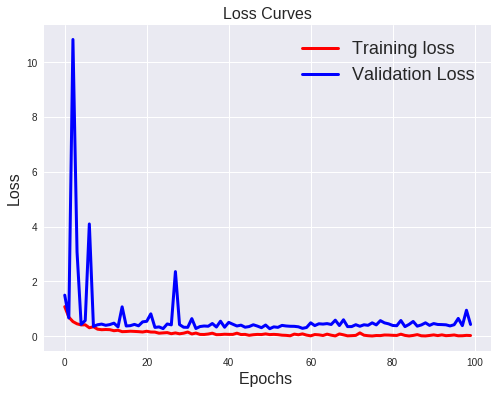

In [75]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

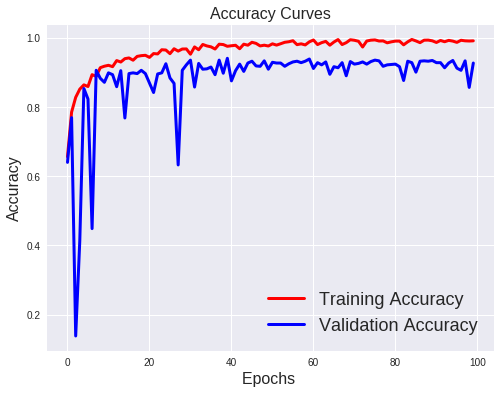

In [76]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [0]:
y_test = model.predict(x_test)

In [81]:
y_test1 = [label_encoder.inverse_transform([np.argmax(y_test[i,:])]) for i in range(len(y_test))]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [0]:
import pandas as pd
df2 = pd.DataFrame(data=[np.array(names),y_test1]).T
df2.rename(index=str, columns={0: "file", 1: "species"},inplace=True)

In [83]:
df2

,file,species
0,93d76fd5d.png,[Small-flowered Cranesbill]
1,f445fe6fb.png,[Charlock]
2,6dd095129.png,[Common Chickweed]
3,1926e82fd.png,[Loose Silky-bent]
4,5a6bf96f6.png,[Maize]
5,8faadb6a8.png,[Sugar beet]
6,f1f7c833f.png,[Shepherds Purse]
7,1b6a6494d.png,[Sugar beet]
8,ae90f2827.png,[Common Chickweed]
9,16467a950.png,[Loose Silky-bent]


In [0]:
df2.index = df2['file']

In [0]:
for i in range(len(df2['species'])):
    df2['species'][i] = df2['species'][i][0] 

In [0]:
df2.drop('file',axis=1,inplace=True)

In [0]:
df2.to_csv('mobilenet.csv')

In [0]:
files.download('mobilenet.csv') 